In [1]:
import numpy as np
import os
import cv2 as cv
from utils import *
import matplotlib.pyplot as plt

In [2]:
def load_data(path, image_size, split=1):
    data = []
    labels = []
    total = os.listdir(path)
    total_len = len(total)

    for idx, label in enumerate(total):
        path_label = os.path.join(path, label)
        images = os.listdir(path_label)
        images_total = len(images)
        
        labels.extend([idx for _ in range(int(images_total*split))])
        
        for jdx, image in enumerate(images):
            if jdx >= int(images_total*split): 
                continue
            
            path_image = os.path.join(path_label, image)
            
            try:
                img = cv.imread(path_image)
                img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
                img_resized = cv.resize(img_gray, (image_size, image_size))
                data.append(img_resized)
            except Exception as e:
                print(f"Error {path_image}: {e}")
                continue
            
            print(f'Images [{jdx+1}/{int(images_total*split)}] of [{idx+1}/{total_len}]', end='\r')

    return data, labels

In [ ]:
path = r'\Medical-AI-with-numpy\datasets\Pulmones'
path_train = path + r'\train'
path_test = path + r'\test'

In [4]:
section = 1
data_train, labels_train = load_data(path_train, 84, section)
data_test, labels_test = load_data(path_test, 84, section)

In [5]:
data_train, labels_train = np.array(data_train).astype('float32') / 255.0, np.array(labels_train).astype('float32')
data_test, labels_test = np.array(data_test).astype('float32') / 255.0, np.array(labels_test).astype('float32')

In [6]:
data_train, labels_train = np.expand_dims(data_train, axis=-1), np.expand_dims(labels_train, axis=-1)
data_test, labels_test = np.expand_dims(data_test, axis=-1), np.expand_dims(labels_test, axis=-1)

In [ ]:
model = load_model(r'\Medical-AI-with-numpy\models\lung_model.pkl')

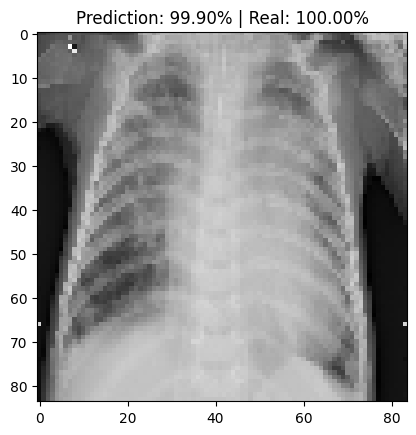

In [26]:
random_idx = np.random.randint(0, data_test.shape[0])
random_image, random_label = data_test[random_idx:random_idx+1], labels_test[random_idx]
prediction = model.forward(random_image)
plt.imshow(random_image.squeeze(0), cmap='gray')
plt.title(f'Prediction: {prediction[0][0]:.2%} | Real: {random_label[0]:.2%}')
plt.show()